# Introducción al machine learning

**API 2**

**Alumno**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repositorio**: [GitHub](https://github.com/hhvergara/teclab_intro_ml)

### Situación
El RMS Titanic fue, en su momento, el mayor barco de pasajeros del mundo.
Se  hundió  en  su  viaje  inaugural  de  Southampton  a  Nueva  York,  en  el  año
1912. En el evento, fallecieron 1514 de las 2223 personas que iban a bordo,
entre tripulación y pasajeros.
Hoy, en el año 2022, se ha decidido hacer un estudio de machine learning en
el cual se requiere de nuestras labores como técnicos en Data Science, para
identificar  diversos  patrones  que  permitan  verificar  si,  basándonos  en  el
entrenamiento de nuestro modelo de datos, la máquina es capaz de predecir
si una persona logra sobrevivir o no.
Para  ello  se  utilizarán  varias  bases  para  llevar  a  cabo  nuestro  análisis:  las
primeras denominadas “train.csv” y “test.csv”, que pertenecen a un set de
datos de entrenamiento; y otra para testear nuestra información.

### Consignas

El  desafío  actual  consiste  en  generar  un  modelo  de  regresión  logística  que
permita calcular el grado de accuracy con el cual se pueda determinar, en el
grupo de "prueba", quiénes son los sobrevivientes en la tragedia del Titanic.

a) Describir  brevemente la  cantidad  de  valores  faltantes  para  cada  una
de las variables de la base de datos.

b) Completar  aquellas  variables  que  se  encuentran  faltantes  para  las
bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).

c) Ajustar el primer modelo de regresión logística.

d) Entrenar y determinar el nivel de accuracy del primer modelo.

#### 💡 Importamos las librerias y cargamos el dataset que vamos a utilizar:

In [101]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data', 'API2')
filename_train_data = os.path.join(__data_dir__, 'train.csv')
filename_test_data = os.path.join(__data_dir__, 'test.csv')
printing = lambda text: print("\033[92m" + text + "\033[0m")

In [102]:
train_data = pd.read_csv(filename_train_data).sort_values('PassengerId')
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### a) Visualizamos los valores nulos en el dataset:

In [103]:
# Porcentaje de datos nulos por columna:
100 * (train_data.isnull().sum() / train_data.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### B) Reemplazo de valores
Luego de analizar el porcentaje de valores nulos en el dataset, vemos que Cabin tiene un 77.10% de datos faltantes, por lo tanto, es difícil obtener una tendencia con estos datos.
Vamos a imputar las columnas Age y Embarked para cubrir estos faltantes

In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 💡 One Hot Encoder
Teniendo en cuenta que los modelos trabajan con tipos de datos numéricos (int y float) tenemos que llevar los tipos "object" a un formato numérico usando algún método de encoder. Para este caso, utilizamos One Hot Encoder, para proponer algo distinto a lo visto en clase.

In [114]:
categorical_columns = ['Sex', 'Embarked']

df_pandas_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

print(f"One-Hot Encoded Data Usando Pandas:\n{df_pandas_encoded}\n")

# Inicializamos el encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit y transform las columnas categoricas:
one_hot_encoded = encoder.fit_transform(train_data[categorical_columns])

encoded_columns = [x for x in encoder.get_feature_names_out(categorical_columns)]

# Creamos un dataframe con las columnas one-hot encoded:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_columns)

# Concatenamos estas nuevas columnas con el dataframe original:
train_data = pd.concat([train_data.drop(categorical_columns, axis=1), one_hot_df], axis=1)

train_data.info()


KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [106]:
# Imputamos las columnas con nulos para reemplazarlos con los vecinos cercanos
imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_data[['Age'] + encoded_columns] = imputer.fit_transform(train_data[['Age'] + encoded_columns])

display(train_data.info())
100 * (train_data.isnull().sum() / train_data.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Sex_female    891 non-null    float64
 11  Sex_male      891 non-null    float64
 12  Embarked_C    891 non-null    float64
 13  Embarked_Q    891 non-null    float64
 14  Embarked_S    891 non-null    float64
 15  Embarked_nan  891 non-null    float64
dtypes: float64(8), int64(5), object(3)
memory usage: 111.5+ KB


None

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Age              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin           77.104377
Sex_female       0.000000
Sex_male         0.000000
Embarked_C       0.000000
Embarked_Q       0.000000
Embarked_S       0.000000
Embarked_nan     0.000000
dtype: float64

#### C) Comenzamos a preparar el modelo de regresión logística:

In [107]:
# Seleccionamos las columnas que vamos a usar para el entrenamiento
x, y = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] + encoded_columns], train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [108]:
# Dividimos el conjunto de datos en entrenamiento y validación
seed_number = 28
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=seed_number)

#### D) Entrenamos nuestro modelo:

In [109]:
# Creamos el modelo de regresión logística
reg = LogisticRegression(random_state=seed_number)
reg.fit(x_train, y_train)

/Users/hvergara/Documents/test/Teclab/teclab_intro_ml/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=28)

#### Realizamos una predicción y visualizamos el accuracy del modelo:

In [110]:
# Predicciones
y_pred = reg.predict(x_val)
reg_acc = accuracy_score(y_val, y_pred)
reg_prec = precision_score(y_val, y_pred)
reg_rec = recall_score(y_val, y_pred)
reg_f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {reg_acc}')
print(f'Precision: {reg_prec}')
print(f'Recall: {reg_rec}')
print(f'F1: {reg_f1}')

Accuracy: 0.7661016949152543
Precision: 0.75
Recall: 0.6153846153846154
F1: 0.676056338028169


#### Ahora probamos un árbol de decisión para comparar el accuracy:

In [111]:
tree = DecisionTreeClassifier(random_state=seed_number)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=28)

In [112]:
# Predicciones
y_pred = tree.predict(x_val)
tree_acc = accuracy_score(y_val, y_pred)
tree_prec = precision_score(y_val, y_pred)
tree_rec = recall_score(y_val, y_pred)
tree_f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {tree_acc}')
print(f'Precision: {tree_prec}')
print(f'Recall: {tree_rec}')
print(f'F1: {tree_f1}')

Accuracy: 0.7389830508474576
Precision: 0.6851851851851852
Recall: 0.6324786324786325
F1: 0.6577777777777778


### Generamos un gráfico para comparar ambos modelos:

Text(0.5, 1.05, 'Model Performance Metrics')

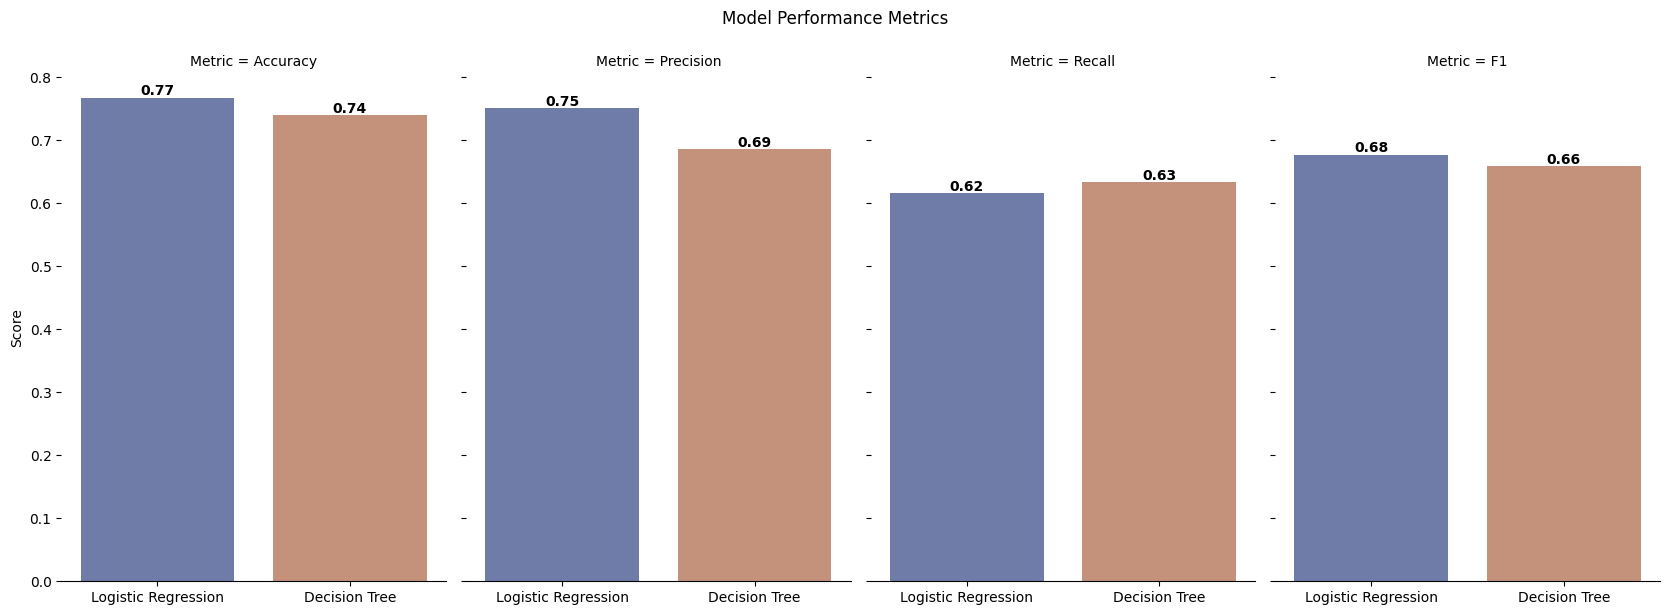

In [113]:
df_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [reg_acc, tree_acc],
    'Precision': [reg_prec, tree_prec],
    'Recall': [reg_rec, tree_rec],
    'F1': [reg_f1, tree_f1]
})

# Transforma el dataframe a un formato largo adecuado para FacetGrid
df_melted = df_accuracy.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Crea el gráfico con FacetGrid
g = sns.catplot(
    data=df_melted, kind="bar",
    x="Model", y="Score", hue="Model", col="Metric",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=0.7
)

# Añade etiquetas numéricas a cada barra
for ax in g.axes.flat:
    for bar in ax.patches:
        # Obtiene la posición de cada barra y su altura para etiquetar
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Ajusta los detalles del gráfico
g.despine(left=True)
g.set_axis_labels("", "Score")
g.fig.suptitle("Model Performance Metrics", y=1.05)

## Conclusión:
Analizando el gráfico resultante, vemos que el modelo de regresión logística es ligeramente mejor que el modelo de árboles de decisión.